## Workflow
- Build a model that can predict consumed fuel from engine speed, speed over ground, and possibly other parameters. Consumed fuel 
- should be the accumulated fuel rate over time.
- Compare the accuracy of the model for different time periods of accumulated fuel
- Analyse the sensitivity of the accumulated fuel to know how much it can deviate.
- Analyse how long time is needed for tuning the model and how it can be corrected over time.

## Typical signals

- fuel rate
- rpm
- torque
- speed over groun

## Import libaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1 : With instant fuel consumption  

### EDA

In [3]:
df = pd.read_csv(r'C:\Users\Kun\Downloads\month_7.csv')
df.head()

C:\Users\Kun\AppData\Local\Temp\ipykernel_8508\1349322939.py:1: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Kun\Downloads\month_7.csv')


,Unnamed: 0,timestamp,engineFuelRate,engineSpeed,latitude,longitude,windDirectionApparent,windDirectionTrue,windSpeedApparent,windSpeedOverGround,...,legUUID,on_route,mainRouteId,distanceToNextDock,distanceToPreviousDock,segmentId,segmentUUID,accumFuelLeg,accumDistLeg,accumTimeLeg
0,8017292,2022-07-01 00:00:00.000,1.0,0.0,59.331653,18.079153,270.0923,130.2963,1.440,1.49,...,57c14d10-792c-4526-90ab-f2d29fa36e25,NaN,119,NaN,NaN,29110,c07a858d-4a80-4985-92ca-f49277915740,20.647542,3948.035487,71163.0
1,8017293,2022-07-01 00:00:00.300,1.0,0.0,59.331653,18.079153,270.0923,125.6955,1.590,1.54,...,57c14d10-792c-4526-90ab-f2d29fa36e25,NaN,119,NaN,NaN,29110,c07a858d-4a80-4985-92ca-f49277915740,20.647625,3948.037413,71163.3
2,8017294,2022-07-01 00:00:00.600,1.0,0.0,59.331653,18.079153,270.0923,127.4946,1.590,1.49,...,57c14d10-792c-4526-90ab-f2d29fa36e25,NaN,119,NaN,NaN,29110,c07a858d-4a80-4985-92ca-f49277915740,20.647708,3948.039432,71163.6
3,8017295,2022-07-01 00:00:00.900,1.0,0.0,59.331653,18.079153,270.0923,127.4946,1.590,1.49,...,57c14d10-792c-4526-90ab-f2d29fa36e25,NaN,119,NaN,NaN,29110,c07a858d-4a80-4985-92ca-f49277915740,20.647792,3948.041884,71163.9
4,8017296,2022-07-01 00:00:01.200,1.0,0.0,59.331653,18.079152,271.8914,127.4946,1.515,1.49,...,57c14d10-792c-4526-90ab-f2d29fa36e25,NaN,119,NaN,NaN,29110,c07a858d-4a80-4985-92ca-f49277915740,20.647875,3948.045117,71164.2


In [4]:
print(df.columns)

Index(['Unnamed: 0', 'timestamp', 'engineFuelRate', 'engineSpeed', 'latitude',
       'longitude', 'windDirectionApparent', 'windDirectionTrue',
       'windSpeedApparent', 'windSpeedOverGround', 'engineTripFuel',
       'temperature', 'magneticVariation', 'satellites', 'pitch', 'rateOfTurn',
       'roll', 'pressure', 'courseOverGroundTrue', 'headingMagnetic',
       'headingTrue', 'speedOverGround', 'deltaDistance', 'fileName',
       'deltaTimestamp', 'fuelPerStep', 'fuelPerStepEngineTrip',
       'acceleration', 'windSpeedApparentCalculated',
       'windDirectionApparentCalculated', 'courseHeadingDiff', 'engineOn',
       'steadyState', 'sailingState', 'distanceFromDock', 'closestDock',
       'segmentState', 'leg', 'legId', 'legUUID', 'on_route', 'mainRouteId',
       'distanceToNextDock', 'distanceToPreviousDock', 'segmentId',
       'segmentUUID', 'accumFuelLeg', 'accumDistLeg', 'accumTimeLeg'],
      dtype='object')


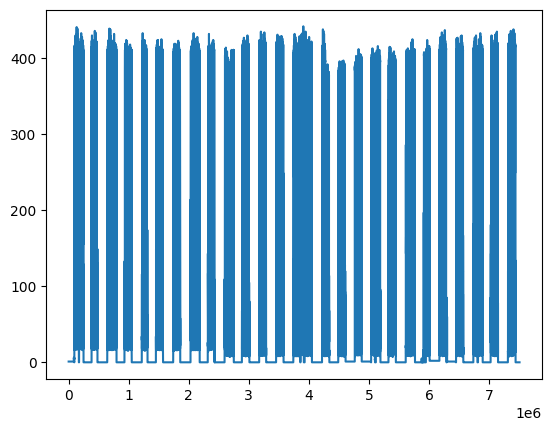

In [5]:
plt.plot(df.index, df.engineFuelRate)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7508268 entries, 0 to 7508267
Data columns (total 49 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Unnamed: 0                       int64  
 1   timestamp                        object 
 2   engineFuelRate                   float64
 3   engineSpeed                      float64
 4   latitude                         float64
 5   longitude                        float64
 6   windDirectionApparent            float64
 7   windDirectionTrue                float64
 8   windSpeedApparent                float64
 9   windSpeedOverGround              float64
 10  engineTripFuel                   float64
 11  temperature                      float64
 12  magneticVariation                float64
 13  satellites                       float64
 14  pitch                            float64
 15  rateOfTurn                       float64
 16  roll                             float64
 17  pressure

In [7]:
df.describe()

,Unnamed: 0,engineFuelRate,engineSpeed,latitude,longitude,windDirectionApparent,windDirectionTrue,windSpeedApparent,windSpeedOverGround,engineTripFuel,...,courseHeadingDiff,distanceFromDock,legId,mainRouteId,distanceToNextDock,distanceToPreviousDock,segmentId,accumFuelLeg,accumDistLeg,accumTimeLeg
count,7.508268e+06,7.508268e+06,7.508268e+06,7.508268e+06,7.508268e+06,7.508268e+06,7.508257e+06,7.508268e+06,7.508257e+06,7.508268e+06,...,6.279787e+06,7.508268e+06,7.508268e+06,7.508268e+06,3.004539e+06,3.004539e+06,7.508268e+06,7.508268e+06,7.508268e+06,7.508268e+06
mean,1.177143e+07,9.562101e+01,6.604081e+02,5.934930e+01,1.826353e+01,1.704924e+02,2.001873e+02,5.502877e+00,5.889338e+00,1.581259e+06,...,4.028166e-02,7.764531e+02,2.400067e+03,2.080539e+02,4.238492e+03,4.312047e+03,4.406928e+04,6.223610e+01,7.930796e+03,7.289199e+07
std,2.167450e+06,1.567812e+02,7.989963e+02,3.832677e-02,2.749401e-01,1.072343e+02,9.151485e+01,5.520621e+00,7.446488e+00,2.259699e+04,...,1.835904e+00,1.502595e+03,6.110737e+02,5.428899e+01,3.894385e+03,4.114912e+03,7.626683e+03,2.124450e+02,2.621965e+04,3.395211e+08
min,8.017292e+06,0.000000e+00,0.000000e+00,5.928857e+01,1.807413e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.565720e+05,...,-3.141559e+00,1.803952e-10,1.341000e+03,1.190000e+02,1.428418e-02,1.399229e-01,2.911000e+04,0.000000e+00,0.000000e+00,3.000000e-01
25%,9.894359e+06,0.000000e+00,0.000000e+00,5.933165e+01,1.807912e+01,7.699410e+01,1.316943e+02,1.490000e+00,1.440000e+00,1.563130e+06,...,-1.568868e+00,2.294771e+00,1.862000e+03,1.630000e+02,1.115031e+03,1.141280e+03,3.775600e+04,7.019167e-01,3.864740e+02,4.959000e+02
50%,1.177143e+07,1.000000e+00,0.000000e+00,5.933168e+01,1.807916e+01,1.703432e+02,1.976934e+02,3.080000e+00,2.880000e+00,1.576576e+06,...,8.097961e-02,4.715125e+00,2.365000e+03,2.040000e+02,3.382978e+03,3.435756e+03,4.384300e+04,2.122000e+00,1.234379e+03,2.233800e+03
75%,1.364849e+07,1.040000e+02,1.300500e+03,5.936468e+01,1.837336e+01,2.700923e+02,2.861924e+02,8.230000e+00,6.270000e+00,1.599650e+06,...,1.647647e+00,9.084263e+02,2.918000e+03,2.560000e+02,6.350484e+03,6.412017e+03,5.052700e+04,2.710729e+01,3.751701e+03,1.531020e+04
max,1.552556e+07,4.420000e+02,2.014500e+03,5.948329e+01,1.893374e+01,3.598920e+02,3.598920e+02,4.228000e+01,4.464000e+01,1.617572e+06,...,3.141574e+00,7.826879e+03,3.454000e+03,3.050000e+02,4.270013e+04,4.610433e+04,5.686900e+04,1.255531e+03,1.593426e+05,1.654812e+09


- Checking for missing values

In [8]:
df.engineFuelRate.isnull().sum(), df.engineSpeed.isnull().sum(), df.speedOverGround.isnull().sum()

(0, 0, 0)

- reform the 'timestamp' values and convert the feature into float

In [9]:
df['timestamp'] = df['timestamp'].replace([':', '-', ' '],'', regex=True)
df['timestamp'] = df['timestamp'].astype('float')

df.head(2)

,Unnamed: 0,timestamp,engineFuelRate,engineSpeed,latitude,longitude,windDirectionApparent,windDirectionTrue,windSpeedApparent,windSpeedOverGround,...,legUUID,on_route,mainRouteId,distanceToNextDock,distanceToPreviousDock,segmentId,segmentUUID,accumFuelLeg,accumDistLeg,accumTimeLeg
0,8017292,2.022070e+13,1.0,0.0,59.331653,18.079153,270.0923,130.2963,1.44,1.49,...,57c14d10-792c-4526-90ab-f2d29fa36e25,NaN,119,NaN,NaN,29110,c07a858d-4a80-4985-92ca-f49277915740,20.647542,3948.035487,71163.0
1,8017293,2.022070e+13,1.0,0.0,59.331653,18.079153,270.0923,125.6955,1.59,1.54,...,57c14d10-792c-4526-90ab-f2d29fa36e25,NaN,119,NaN,NaN,29110,c07a858d-4a80-4985-92ca-f49277915740,20.647625,3948.037413,71163.3


-  Futures plots

[Text(0.5, 0, 'Engine Speed'),
 Text(0, 0.5, 'Fuel Rate'),
 Text(0.5, 1.0, 'Engine Speed VS Fuel Rate')]

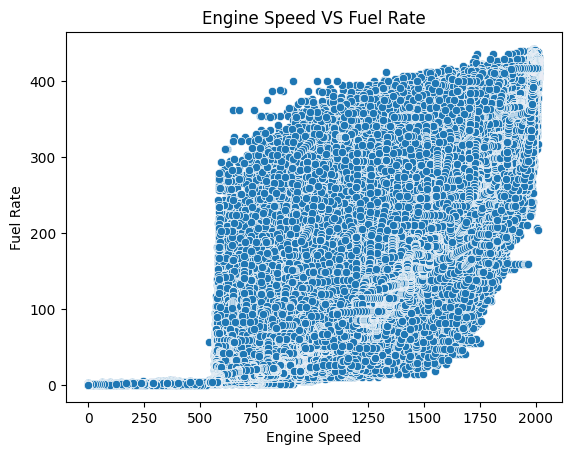

In [10]:
sns.scatterplot(data=df, x=df.engineSpeed, y=df.engineFuelRate).set(xlabel="Engine Speed", ylabel = "Fuel Rate", title= "Engine Speed VS Fuel Rate")

[Text(0.5, 0, 'Speed over ground'),
 Text(0, 0.5, 'Fuel Rate'),
 Text(0.5, 1.0, 'Speed overground VS Fuel Rate')]

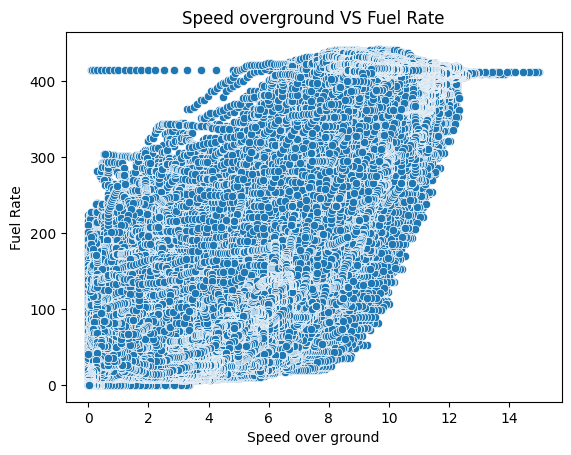

In [11]:
sns.scatterplot(data=df, x=df.speedOverGround, y=df.engineFuelRate).set(xlabel="Speed over ground", ylabel = "Fuel Rate", title= "Speed overground VS Fuel Rate")

- The engine fuel rate is close to zero when Engine Speed is lower than 550.
- Here we think of remove all the outliers before we make the model.

In [12]:
df = df.loc[df.engineSpeed > 550]
df.shape

(3426523, 49)

#### Defind fuel consumption based on every 0.3 second

In [13]:
df['FuelConsumption'] = df['engineFuelRate']*0.3/3600

In [14]:
df.FuelConsumption.info()

<class 'pandas.core.series.Series'>
Int64Index: 3426523 entries, 93943 to 7441577
Series name: FuelConsumption
Non-Null Count    Dtype  
--------------    -----  
3426523 non-null  float64
dtypes: float64(1)
memory usage: 52.3 MB


In [15]:
X, y = df[["engineSpeed", "speedOverGround"]], df["FuelConsumption"]
X.head(5), y.head(5)

(       engineSpeed  speedOverGround
 93943       752.00         0.074821
 93944       772.75         0.068283
 93945       793.50         0.061961
 93946       766.50         0.055971
 93947       707.00         0.050475,
 93943    0.00025
 93944    0.00025
 93945    0.00025
 93946    0.00025
 93947    0.00025
 Name: FuelConsumption, dtype: float64)

In [16]:
X.shape, y.shape

((3426523, 2), (3426523,))

## Modeling

### Data split

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
    
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2295770, 2), (2295770,), (565376, 2), (565376,), (565377, 2), (565377,))

#### Feature scaling/Feature standardization

- Normalization (min-max feature scaling)

In [48]:
scaler = MinMaxScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

print(f"{scaled_X_train.min():.2f} ≤ scaled_X_train ≤ {scaled_X_train.max():.2f}")
print(f"{scaled_X_val.min():.2f} ≤ scaled_X_train ≤ {scaled_X_val.max():.2f}")
print(f"{scaled_X_test.min():.2f} ≤ scaled_X_test ≤ {scaled_X_test.max():.2f}") 

0.00 ≤ scaled_X_train ≤ 1.00
0.00 ≤ scaled_X_train ≤ 1.00
0.00 ≤ scaled_X_test ≤ 1.00


## Linear regression algorithm

In [49]:
from code import interact
from sklearn.linear_model import LinearRegression

model_SVD = LinearRegression(fit_intercept = True)
model_SVD.fit(scaled_X_train, y_train)
print(f"Parameters: {model_SVD.coef_}")
print(f"Intercept: {model_SVD.intercept_}")

model_SVD.score(scaled_X_val, y_val)

Parameters: [0.03312954 0.00786806]
Intercept: -0.006202315325250181


0.9361513119200464

### Stochastic gradient descent

In [50]:
from sklearn.linear_model import SGDRegressor

model_SGD = SGDRegressor(loss = "squared_error", learning_rate="invscaling", max_iter = 1000)
model_SGD.fit(scaled_X_train, y_train)
print(f"Parameters: {model_SGD.coef_}")
print(f"Intercept: {model_SGD.intercept_}")

model_SGD.score(scaled_X_val, y_val)

Parameters: [0.03302502 0.00801863]
Intercept: [-0.0061376]


0.9361220558339358

### Manual test


In [89]:
test_sample_features = scaled_X_test[54000].reshape(1,-1)
test_sample_target = y_test.values[54000]

print(f"Scaled features {test_sample_features}, label {test_sample_target:.7f}")
print(f"Prediction SVD: {model_SVD.predict(test_sample_features)[0]:.7f}")
print(f"Prediction SGD: {model_SGD.predict(test_sample_features)[0]:.7f}")

Scaled features [[0.28586066 0.00667219]], label 0.0038333
Prediction SVD: 0.0033206
Prediction SGD: 0.0033565


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_SVD = model_SVD.predict(scaled_X_test)
y_pred_SGD = model_SGD.predict(scaled_X_test)

mae_SVD = mean_absolute_error(y_test, y_pred_SVD)
mse_SVD = mean_squared_error(y_test, y_pred_SVD)
rmse_SVD = np.sqrt(mse_SVD)

mae_SGD = mean_absolute_error(y_test, y_pred_SGD)
mse_SGD = mean_squared_error(y_test, y_pred_SGD)
rmse_SGD = np.sqrt(mse_SGD)

print(f"SVD, MAE: {mae_SVD:.7f}, MSE: {mse_SVD:.7f}, RMSE: {rmse_SVD:.7f}")
print(f"SGD, MAE: {mae_SGD:.7f}, MSE: {mse_SGD:.7f}, RMSE: {rmse_SGD:.7f}")

SVD, MAE: 0.0029208, MSE: 0.0000133, RMSE: 0.0036416
SGD, MAE: 0.0029254, MSE: 0.0000133, RMSE: 0.0036416


In [80]:
pred_SVD = model_SVD.predict(scaled_X_test)
pred_SVD.shape

(565377,)

Error figure between y_test and predictors

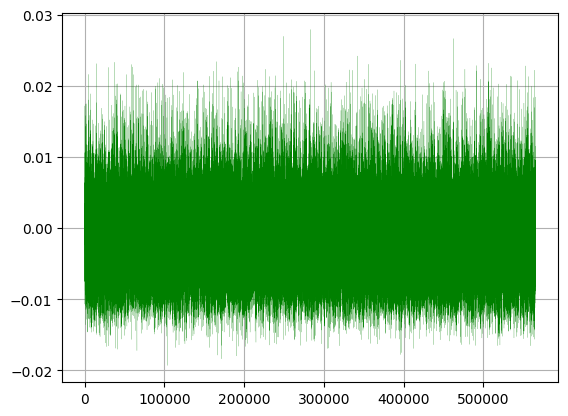

In [81]:
t = np.arange(len(scaled_X_test))
error = y_test-pred_SVD
plt.plot(t, error, 'g-', linewidth = 0.1)
plt.title = ('Compare y_test & predictors')
plt.grid()
plt.show()

## Polynomial regression

- By thinking of the interaction effects between EngineSpeed and SpeedOverGround, I try to use polynomial regression with higher degrees.

### Compare with RMSE with different degrees

In [23]:
from sklearn.preprocessing import PolynomialFeatures

MAE_val = []

for degree in range(1,10):
    model_poly = PolynomialFeatures(degree, include_bias=False)

    train_features = model_poly.fit_transform(X_train) # find out the polynomial combinations on training data
    val_features = model_poly.transform(X_val) # find out the polynomial combinations on validation data
    model_lin_reg = LinearRegression() # regression model fit 

    model_lin_reg.fit(train_features, y_train) 

    y_pred_val = model_lin_reg.predict(val_features) # use the model from train data to predict Y on validation data
    
    MAE_val.append(mean_absolute_error(y_val, y_pred_val))

[Text(0.5, 0, 'Degree'),
 Text(0, 0.5, 'MAE'),
 Text(0.5, 1.0, 'MAE on validation data for different degrees of polynomial')]

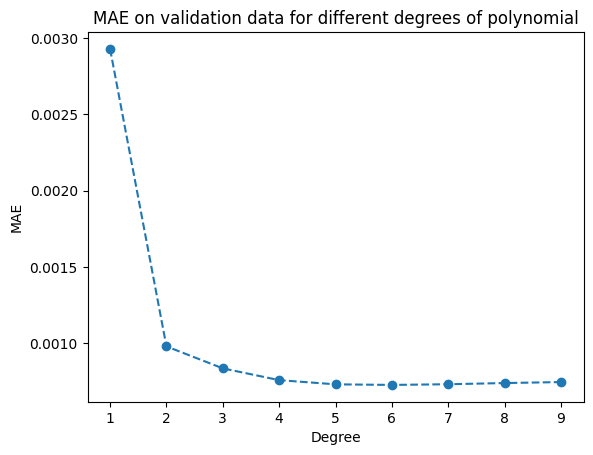

In [24]:
fig, ax = plt.figure(), plt.axes()

ax.plot(range(1,10), MAE_val[:10],'--o', label = "Validation")
ax.set(xlabel = "Degree", ylabel = "MAE", title = "MAE on validation data for different degrees of polynomial")

In [57]:
poly_model_4 = PolynomialFeatures(4, include_bias=False)
X_train_features = poly_model_4.fit_transform(scaled_X_train)
print(X_train_features.shape)

model_poly = LinearRegression()
model_poly.fit(X_train_features, y_train)

(2295770, 14)


LinearRegression()

In [53]:
X_features_val_4_degree = poly_model_4.fit_transform(scaled_X_val)

model_poly.score(X_features_val_4_degree,y_val)

0.9888413808863933

In [92]:
X_features_test_4_degree = poly_model_4.fit_transform(scaled_X_test)
pred_poly_test = model_poly.predict(X_features_test_4_degree)

In [93]:
mae_Poly = mean_absolute_error(y_test, pred_poly_test)
mse_Poly = mean_squared_error(y_test, pred_poly_test)
rmse_Poly = np.sqrt(mse_SGD)

print(f"Polynormial, MAE: {mae_Poly:.7f}, MSE: {mse_Poly:.7f}, RMSE: {rmse_Poly:.7f}")

Polynormial, MAE: 0.0007580, MSE: 0.0000023, RMSE: 0.0036416


Error figure between y_test and predictors

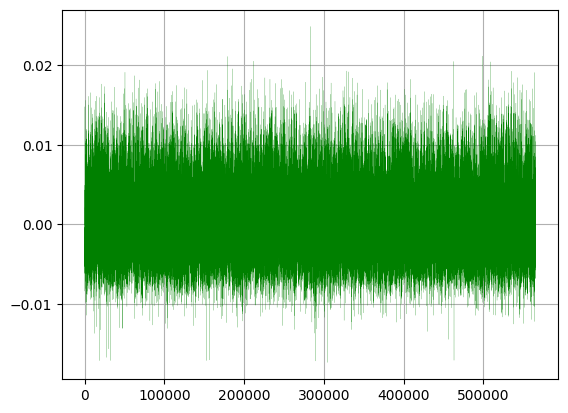

In [77]:
t = np.arange(len(scaled_X_test))
error = y_test-pred_poly_test
plt.plot(t, error, 'g-', linewidth = 0.1)
plt.title = ('Compare y_test & predictors')
plt.grid()
plt.show()

### Manual test

In [91]:
test_sample_features = scaled_X_test[67333].reshape(1,-1)
test_sample_target = y_test.values[67333]

print(f"Scaled features {test_sample_features}, label {test_sample_target:.7f}")
print(f"Prediction SVD: {model_SVD.predict(test_sample_features)[0]:.7f}")
print(f"Prediction PolyNormial: {model_poly.predict(poly_model_4.transform(test_sample_features))}")

Scaled features [[0.99692623 0.77530856]], label 0.0340833
Prediction SVD: 0.0329256
Prediction PolyNormial: [0.03420942]


## KNN regression model

- evaluate the KNN model with different k

In [98]:
from sklearn import neighbors

mae_val = []
for K in range(20):
    K = K+1
    model_knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    model_knn.fit(scaled_X_train, y_train)  # fit the model
    pred=model_knn.predict(scaled_X_test) # make prediction on test set
    error = mean_absolute_error(y_test,pred) # calculate mae
    mae_val.append(error) # store mae values
    print('MAE value for k= ' , K , 'is:', error , 'Score(correlation) is:', model_knn.score(scaled_X_test, y_test))

MAE value for k=  1 is: 0.0006978968731671029 Score(correlation) is: 0.9841140606073284
MAE value for k=  2 is: 0.0006267867683172726 Score(correlation) is: 0.9881288397430522
MAE value for k=  3 is: 0.0005953106662168968 Score(correlation) is: 0.9894500817751842
MAE value for k=  4 is: 0.0005779622717258546 Score(correlation) is: 0.9901062525611958
MAE value for k=  5 is: 0.0005676022408370674 Score(correlation) is: 0.9904794439732549
MAE value for k=  6 is: 0.0005603487533921409 Score(correlation) is: 0.9907291659895973
MAE value for k=  7 is: 0.0005544911724846342 Score(correlation) is: 0.990890153892137
MAE value for k=  8 is: 0.000549856483727444 Score(correlation) is: 0.9910360875379983
MAE value for k=  9 is: 0.000546269023127208 Score(correlation) is: 0.9911364680149782
MAE value for k=  10 is: 0.0005429643362443175 Score(correlation) is: 0.9912336416264819
MAE value for k=  11 is: 0.0005409906609643767 Score(correlation) is: 0.9912953261788455
MAE value for k=  12 is: 0.000538

<AxesSubplot:>

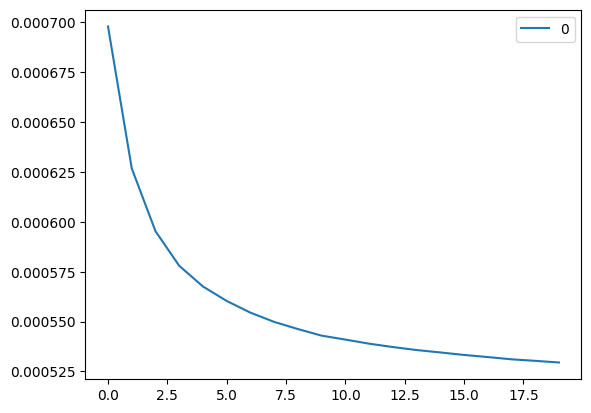

In [99]:
curve = pd.DataFrame(mae_val) 
curve.plot()

In [95]:
from sklearn import neighbors

knn_reg = neighbors.KNeighborsRegressor(n_neighbors=7, weights='uniform') # the defalt value of k is 5
knn_reg.fit(scaled_X_train, y_train)
knn_reg.score(scaled_X_val, y_val)

0.9908557182831144

In [96]:
pred_knn_test = knn_reg.predict(scaled_X_test)

In [100]:
mae_knn = mean_absolute_error(y_test, pred_knn_test)
mse_knn = mean_squared_error(y_test, pred_knn_test)
rmse_knn = np.sqrt(mse_SGD)

print(f"Polynormial, MAE: {mae_knn:.7f}, MSE: {mse_knn:.7f}, RMSE: {rmse_knn:.7f}")

Polynormial, MAE: 0.0005545, MSE: 0.0000019, RMSE: 0.0036416


In [101]:
test_sample_features = scaled_X_test[234567].reshape(1,-1)
test_sample_target = y_test.values[234567]

print(f"Scaled features {test_sample_features}, label {test_sample_target:.7f}")
print(f"Prediction SVD: {model_SVD.predict(test_sample_features)[0]:.7f}")
print(f"Prediction PolyNormial: {model_poly.predict(poly_model_4.transform(test_sample_features))}")
print(f"Prediction KNN: {knn_reg.predict(test_sample_features)[0]:.7f}")

Scaled features [[0.99692623 0.78899587]], label 0.0343333
Prediction SVD: 0.0330333
Prediction PolyNormial: [0.03399534]
Prediction KNN: 0.0342262


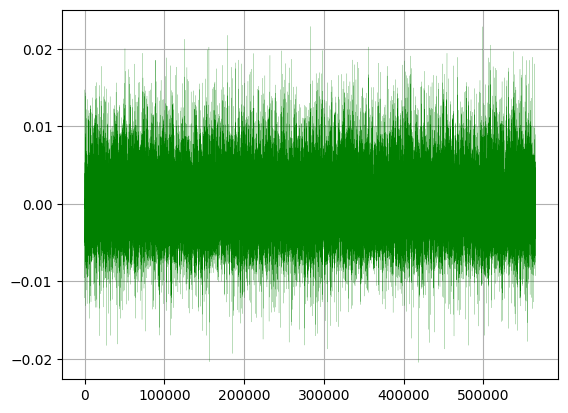

In [102]:
t = np.arange(len(scaled_X_test))
error = y_test-pred_knn_test
plt.plot(t, error, 'g-', linewidth = 0.1)
plt.title = ('Compare y_test & predictors')
plt.grid()
plt.show()

#### Choosing the right value for K

- As decreasing the value of K to 1, the predictions become less stable. (overfitting)
- As we increase the value of K, our predictions become more stable due to majority voting / averaging. However, we begin to witness an increasing number of errors. (underfitting) The model will be more likely to close to Linear regression.
- we usually make K an odd number to have a tiebreaker.

#### Advantages & disadvantages for KNN

- The algorithm is simple and easy to implement.
- There’s no need to build a model, tune several parameters, or make additional assumptions.
- It can used for both classification and regression.

- The algorithm gets significantly slower as the number of data size and features increase. (Not suggest for more than 3 features. The prediction will be not stable because the curse of dimensionality)

|      Models      |       MAE      |     Score (corralation)    |
|-----------------|-----------------|---------------|
|     Linear Regression     |       0.0029208       |       0.93615       |
|         SGD        |        0.0029189         |     0.93612    | 
|           Polynormial Regression      |         0.0007580     |   0.98884 |
|             KNN (k = 7)   |         0.0005545      |       0.99086        | 



- references:
https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761